### Prisoner's dilemma using Axelrod library

In [8]:
import axelrod as axl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

Analysing: 100%|██████████| 25/25 [00:00<00:00, 162.52it/s]



Tournament results (200 rounds per matchup)
1. Defector                       Total Score: 220600
2. Grudger                        Total Score: 219488
3. Tit For Tat                    Total Score: 204642
4. Random: 0.5                    Total Score: 155278
5. Cooperator                     Total Score: 150228


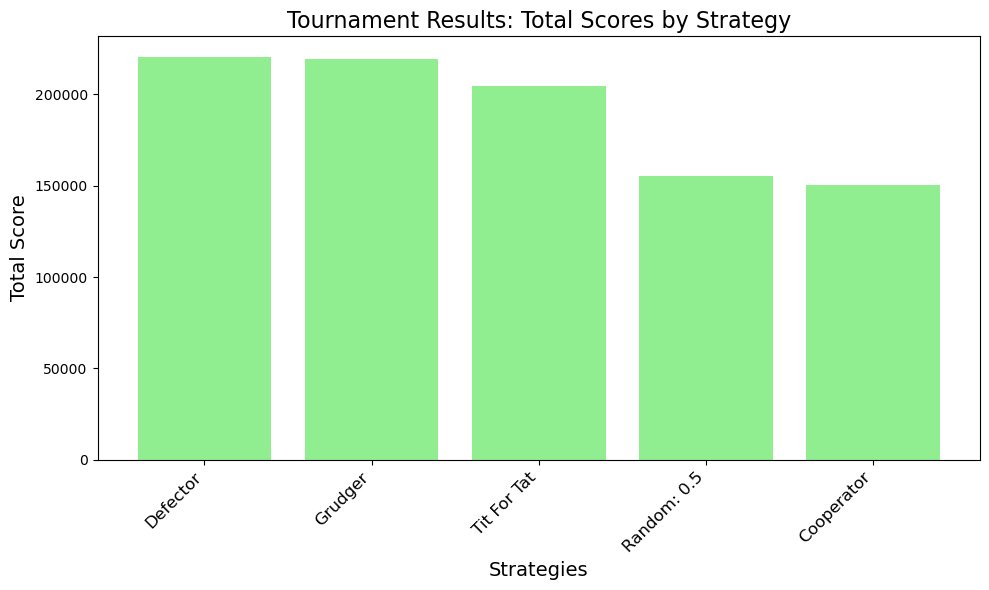

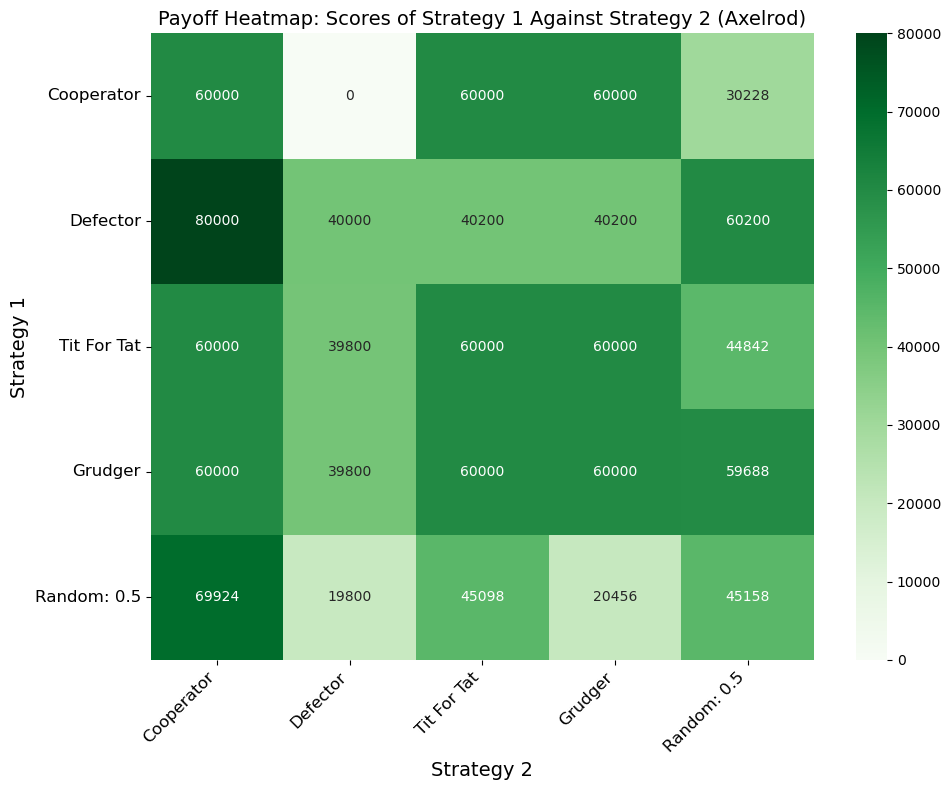

In [ ]:
def run_axelrod_tournament():

    # Defining the same payoff matrix as in the scratch implementation
    custom_game = axl.Game(r=6, s=0, t=8, p=4) #r is reward, s is sucker's payoff, t is temptation, p is punishment
    
    # Creating the same strategies
    strategies = [
        axl.Cooperator(),        # Always cooperate
        axl.Defector(),          # Always defect  
        axl.TitForTat(),         # TitForTat
        axl.Grudger(),           # Grim trigger
        axl.Random()             # Random
    ]
    
    # Tournament with same parameters as scratch
    tournament = axl.Tournament(strategies, turns=200, repetitions=50, game=custom_game)
    results = tournament.play()
    
    # Get total scores and strategy names
    total_scores = [sum(scores) for scores in results.scores]
    strategy_names = [str(s) for s in strategies]
    
    # Display results
    print(f"\nTournament results (200 rounds per matchup)")    
    # Create ranking exactly like in scratch simulation
    results_dict = dict(zip(strategy_names, total_scores))
    sorted_results = sorted(results_dict.items(), key=lambda x: x[1], reverse=True)
    
    for rank, (strategy, score) in enumerate(sorted_results, 1):
        print(f"{rank}. {strategy:30s} Total Score: {score}")
    
    # Create visualizations
    create_visualisation(results, strategies, sorted_results)

    return results, strategies




# Visualising the results in the same way as in the scratch notebook
def create_visualisation(results, strategies, sorted_results):
    # First, the bar chart
    strategy_names = [strategy for strategy, _ in sorted_results]
    scores = [score for _, score in sorted_results]
    
    plt.figure(figsize=(10, 6))
    plt.bar(strategy_names, scores, color='lightgreen')
    plt.title("Tournament Results: Total Scores by Strategy", fontsize=16)
    plt.xlabel("Strategies", fontsize=14)
    plt.ylabel("Total Score", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Then, the heatmap
    payoff_matrix = results.payoff_matrix
    strategy_names_orig = [str(s) for s in strategies]
    total_payoff_matrix = np.array(payoff_matrix) * 200 * 50 # turns * repetitions
    
    # DataFrame is used for the heatmap
    pivot = pd.DataFrame(total_payoff_matrix, 
                        index=strategy_names_orig, 
                        columns=strategy_names_orig)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Greens", cbar=True)
    plt.title("Payoff Heatmap: Scores of Strategy 1 Against Strategy 2 (Axelrod)", fontsize=14)
    plt.xlabel("Strategy 2", fontsize=14)
    plt.ylabel("Strategy 1", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.tight_layout()
    plt.show()

# Running the tournament
results, strategies = run_axelrod_tournament()